<a href="https://colab.research.google.com/github/daichi-a/PythonDataAnalyzeClassMaterial/blob/master/PyDataAnalyze_LinearRegression_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSuJu9JXnBz5z32fc2bXLkLyCf3IoF_BHFVtt1DVvswiGI5v4aGIEq8sF0YzNaP8B1e0bMfb0L7Qe6B/pub?gid=2139355289&single=true&output=csv')
df.head()

,年,八王子.ave,八王子.max.ave,八王子.min.ave
0,1977,23.7,27.4,20.8
1,1978,27.4,33.1,22.3
2,1979,25.9,30.5,22.3
3,1980,22.4,25.8,19.5
4,1981,24.9,29.5,20.8


In [11]:
# 「八王子.max.ave」列，つまり「日最高気温の月平均」列のみを抽出してみる
# 1次元目の「:」は行のインデックスが「0~あるだけ」
# つまり全ての行で，この列を抽出，という意味になる
df_max_ave = df.loc[:, ['八王子.max.ave']]
df_max_ave.head()

,八王子.max.ave
0,27.4
1,33.1
2,30.5
3,25.8
4,29.5


In [12]:
# 年の列も抽出しておく
df_year = df.loc[:, ['年']]
df_year.head()

,年
0,1977
1,1978
2,1979
3,1980
4,1981


説明変数Xの形状 (42, 1)
説明変数Yの形状 (42, 1)


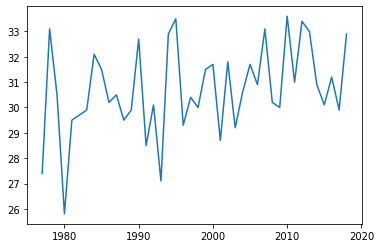

In [13]:
# 説明変数Xは，先ほど抽出したその西暦年年にする
X = df_year

# 目的変数Yは，先ほど抽出した「日最高気温の平均(℃)」にする．
Y = df_max_ave

# 説明変数と目的変数の行列の形状を確認する
#（現在は説明変数一つなので，同じになっている必要がある）
print('説明変数Xの形状', X.shape) #(サンプル数, 説明変数の数(今は1))になっている必要がある
print('説明変数Yの形状', Y.shape) #目的変数なので， (サンプル数， 1)になっている必要がある

#一度グラフに表示してみる
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.show()

回帰係数(傾き): [[0.05160846]]
切片: [-72.38551711]
決定係数 0.12643083363467078


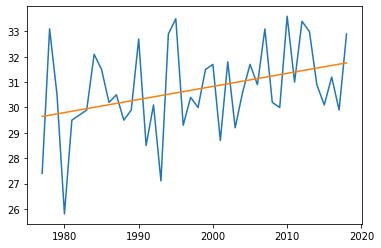

In [14]:
import scipy
import sklearn
from sklearn import linear_model

# 回帰分析するクラスのインスタンスを作る
ols_model = linear_model.LinearRegression()

# 回帰分析を走らせる（学習する)
ols_model.fit(X, Y)

# 結果を出力していく
# 回帰係数(傾き)
print('回帰係数(傾き):', ols_model.coef_)
 
# 切片 (誤差)
print('切片:', ols_model.intercept_)
 
# 決定係数
print('決定係数', ols_model.score(X, Y))
# データにどのぐらいフィットしているかを表す値

# グラフを表示
# まず観測値を再度プロットする
plt.plot(X, Y)
# 次に回帰分析した結果をプロットする
# 回帰分析インスタンスのpredict関数に説明変数Xを入れると，予測した目的変数を出してくれる
predictedY = ols_model.predict(X)
# それを表示
plt.plot(X, predictedY)
# 表示
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 59


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:            八王子.max.ave   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     5.789
Date:                Thu, 02 Apr 2020   Prob (F-statistic):             0.0208
Time:                        09:12:59   Log-Likelihood:                -80.482
No. Observations:                  42   AIC:                             165.0
Df Residuals:                      40   BIC:                             168.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -72.3855     42.846     -1.689      0.0

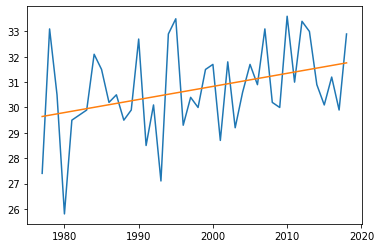

In [15]:
import statsmodels.api as sm
nsamples = Y.shape[0]

ols_model = sm.OLS(Y, sm.add_constant(X))
ols_result = ols_model.fit()

print(ols_result.summary())

predictedY = ols_result.predict(sm.add_constant(X))
plt.plot(X, Y)
plt.plot(X, predictedY)
plt.show()